# NLP model that generates text based on Charles Dickens' Oliver Twist Books

### The model relies on predicting characters and uses a combination of Embedding, GRU, and Dense Layers

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

# Preparation of Data

In [42]:
text= open('/CharlesDickens-OliverTwist.txt', 'rb').read().decode(encoding='utf-8')

In [43]:
text

'CHAPTER I\n\nTREATS OF THE PLACE WHERE OLIVER TWIST WAS BORN AND OF THE\nCIRCUMSTANCES ATTENDING HIS BIRTH\n\nAmong other public buildings in a certain town, which for many reasons\nit will be prudent to refrain from mentioning, and to which I will\nassign no fictitious name, there is one anciently common to most towns,\ngreat or small: to wit, a workhouse; and in this workhouse was born; on\na day and date which I need not trouble myself to repeat, inasmuch as\nit can be of no possible consequence to the reader, in this stage of\nthe business at all events; the item of mortality whose name is\nprefixed to the head of this chapter.\n\nFor a long time after it was ushered into this world of sorrow and\ntrouble, by the parish surgeon, it remained a matter of considerable\ndoubt whether the child would survive to bear any name at all; in which\ncase it is somewhat more than probable that these memoirs would never\nhave appeared; or, if they had, that being comprised within a couple of\np

# Preprocessing

In [44]:
def preprocessor(text):
    text=re.sub('(#|@|/|}|â€¢|\)\w*','', text)
    return text

In [45]:
new_text=[]
for x in text:
    x = " ".join([str(item) for item in x])
    new_text.append(x)

In [46]:
new_text

['C',
 'H',
 'A',
 'P',
 'T',
 'E',
 'R',
 ' ',
 'I',
 '\n',
 '\n',
 'T',
 'R',
 'E',
 'A',
 'T',
 'S',
 ' ',
 'O',
 'F',
 ' ',
 'T',
 'H',
 'E',
 ' ',
 'P',
 'L',
 'A',
 'C',
 'E',
 ' ',
 'W',
 'H',
 'E',
 'R',
 'E',
 ' ',
 'O',
 'L',
 'I',
 'V',
 'E',
 'R',
 ' ',
 'T',
 'W',
 'I',
 'S',
 'T',
 ' ',
 'W',
 'A',
 'S',
 ' ',
 'B',
 'O',
 'R',
 'N',
 ' ',
 'A',
 'N',
 'D',
 ' ',
 'O',
 'F',
 ' ',
 'T',
 'H',
 'E',
 '\n',
 'C',
 'I',
 'R',
 'C',
 'U',
 'M',
 'S',
 'T',
 'A',
 'N',
 'C',
 'E',
 'S',
 ' ',
 'A',
 'T',
 'T',
 'E',
 'N',
 'D',
 'I',
 'N',
 'G',
 ' ',
 'H',
 'I',
 'S',
 ' ',
 'B',
 'I',
 'R',
 'T',
 'H',
 '\n',
 '\n',
 'A',
 'm',
 'o',
 'n',
 'g',
 ' ',
 'o',
 't',
 'h',
 'e',
 'r',
 ' ',
 'p',
 'u',
 'b',
 'l',
 'i',
 'c',
 ' ',
 'b',
 'u',
 'i',
 'l',
 'd',
 'i',
 'n',
 'g',
 's',
 ' ',
 'i',
 'n',
 ' ',
 'a',
 ' ',
 'c',
 'e',
 'r',
 't',
 'a',
 'i',
 'n',
 ' ',
 't',
 'o',
 'w',
 'n',
 ',',
 ' ',
 'w',
 'h',
 'i',
 'c',
 'h',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'm',
 'a',
 'n',

# Tokenization

In [47]:
sliced_text = list(text)
sliced_text

['C',
 'H',
 'A',
 'P',
 'T',
 'E',
 'R',
 ' ',
 'I',
 '\n',
 '\n',
 'T',
 'R',
 'E',
 'A',
 'T',
 'S',
 ' ',
 'O',
 'F',
 ' ',
 'T',
 'H',
 'E',
 ' ',
 'P',
 'L',
 'A',
 'C',
 'E',
 ' ',
 'W',
 'H',
 'E',
 'R',
 'E',
 ' ',
 'O',
 'L',
 'I',
 'V',
 'E',
 'R',
 ' ',
 'T',
 'W',
 'I',
 'S',
 'T',
 ' ',
 'W',
 'A',
 'S',
 ' ',
 'B',
 'O',
 'R',
 'N',
 ' ',
 'A',
 'N',
 'D',
 ' ',
 'O',
 'F',
 ' ',
 'T',
 'H',
 'E',
 '\n',
 'C',
 'I',
 'R',
 'C',
 'U',
 'M',
 'S',
 'T',
 'A',
 'N',
 'C',
 'E',
 'S',
 ' ',
 'A',
 'T',
 'T',
 'E',
 'N',
 'D',
 'I',
 'N',
 'G',
 ' ',
 'H',
 'I',
 'S',
 ' ',
 'B',
 'I',
 'R',
 'T',
 'H',
 '\n',
 '\n',
 'A',
 'm',
 'o',
 'n',
 'g',
 ' ',
 'o',
 't',
 'h',
 'e',
 'r',
 ' ',
 'p',
 'u',
 'b',
 'l',
 'i',
 'c',
 ' ',
 'b',
 'u',
 'i',
 'l',
 'd',
 'i',
 'n',
 'g',
 's',
 ' ',
 'i',
 'n',
 ' ',
 'a',
 ' ',
 'c',
 'e',
 'r',
 't',
 'a',
 'i',
 'n',
 ' ',
 't',
 'o',
 'w',
 'n',
 ',',
 ' ',
 'w',
 'h',
 'i',
 'c',
 'h',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'm',
 'a',
 'n',

In [48]:
#get all unique charcters and add unknown character
corpus = list(sorted(set(sliced_text)))
corpus = ['[UNK]'] + corpus
corpus

['[UNK]',
 '\n',
 ' ',
 '!',
 '"',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

# Indexing

In [49]:
#encoding
#character to index
c_to_id = {c:i for i, c in enumerate(corpus)}
def char_to_id(x):
    return [c_to_id[c] for c in x]

def ids_from_chars(data):
    return np.array([char_to_id(c) for c in data])
#decoding
#index to character
id_to_c = {i:c for i, c in enumerate(corpus)}
def id_to_char(x):
    return [id_to_c[c] for c in x]

def chars_from_ids(data):
    return np.array(id_to_char(c) for c in data)


In [50]:
#get the indexes of every character in the text
all_ids = ids_from_chars(sliced_text)
print(all_ids)

[[17]
 [22]
 [15]
 ...
 [11]
 [ 1]
 [ 1]]


# Sequence Length

In [51]:
#each sequence consist of 100 charcters + output
sequence_length = 100
sequence_length += 1
#remove any other character that would not fit by floor division
sequence_num = len(all_ids) // sequence_length
num_charc_to_take = sequence_length * sequence_num
num_charc_to_take
print('Sequence Length: ', sequence_length, 'Number of characters to take:', num_charc_to_take)

Sequence Length:  101 Number of characters to take: 892032


In [52]:
#take ids till number of characters specified
ids= np.array(all_ids[:num_charc_to_take])
#split the data into sequences of 101, and number of sequences of 10965
ids = np.reshape(ids,(sequence_num, sequence_length))
ids

array([[17, 22, 15, ..., 16, 23, 32],
       [34, 22,  1, ..., 48, 49, 61],
       [44, 52, 57, ..., 63, 58,  2],
       ...,
       [63,  2, 63, ..., 63, 62,  2],
       [58, 49,  2, ..., 48, 10, 10],
       [58, 49,  2, ..., 48, 56, 57]])

# Data Split into X and Y

In [53]:
#the input is the first to the second last word
#the output is the second to the last word
def split(sequences):
    x, y = [],[]
    for sequence in sequences:
        x.append(sequence[:-1])
        y.append(sequence[1:])
    return np.array(x), np.array(y)

x, y = split(ids)
x


array([[17, 22, 15, ...,  2, 16, 23],
       [34, 22,  1, ..., 61, 48, 49],
       [44, 52, 57, ...,  2, 63, 58],
       ...,
       [63,  2, 63, ..., 52, 63, 62],
       [58, 49,  2, ..., 65, 48, 10],
       [58, 49,  2, ..., 55, 48, 56]])

# Deep Learning Model

In [66]:
Epochs = 15
BATCH_SIZE = 64 #batching to accomdate for the weak processor of the computer
rnn_units = 1024 #GRU neuron
embedding_dim = 256 #learn 256 meaning for each word
vocab_size = len(corpus) #number of unique characters in the text

In [67]:
#model inheriting from Keras Model class
class MyModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, rnn_units):
        super().__init__(self)
        #Defining Embedding,, GRU, Densa Layers
        self.embedding = Embedding(vocab_size, embedding_dim)
        self.gru = GRU(rnn_units, return_sequences=True, return_state=True)
        self.dense = Dense(vocab_size)

    #first call
    def call(self, inputs, states=None, return_state=False, training=False):
        x=inputs
        #new x is the meanings predicted by Embedding layer
        x = self.embedding(x, training=training)

        #GRU unit get the first state in case of first character
        if states is None:
            states = self.gru.get_initial_state(x)

        #GRU layer
        x, states = self.gru(x, initial_state=states, training=training)

        #Output layer to get predicted character
        x = self.dense(x, training=training)

        if return_state:
            return x, states
        else:
            return x

In [68]:
#Instance of model
model = MyModel(vocab_size= vocab_size, embedding_dim=embedding_dim, rnn_units=rnn_units)
model.build(input_shape=(None, 100))

In [69]:
#as this is a multiclass classification model, we use Sparse Categorical CrossEntropy and Accuracy
#from logits uses softmax as activation
losses  =tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=losses, metrics='accuracy')

In [70]:
ck = ModelCheckpoint(
    r'C:\Users\Seif\Desktop\Fall 23\RHET 1020\Assignments',
    monitor= 'loss',
    verbose= 1,
    save_best_only= True,
    save_weights_only= True,
)

In [71]:
history = model.fit(x, y, epochs=Epochs, callbacks=ck)

Epoch 1/15
275/276 [============================>.] - ETA: 0s - loss: 2.4430 - accuracy: 0.3312
Epoch 1: loss improved from inf to 2.44107, saving model to C:\Users\Seif\Desktop\Fall 23\RHET 1020\Assignments
276/276 [==============================] - 13s 39ms/step - loss: 2.4411 - accuracy: 0.3316
Epoch 2/15
275/276 [============================>.] - ETA: 0s - loss: 1.7154 - accuracy: 0.4942
Epoch 2: loss improved from 2.44107 to 1.71481, saving model to C:\Users\Seif\Desktop\Fall 23\RHET 1020\Assignments
276/276 [==============================] - 10s 37ms/step - loss: 1.7148 - accuracy: 0.4943
Epoch 3/15
276/276 [==============================] - ETA: 0s - loss: 1.4732 - accuracy: 0.5583
Epoch 3: loss improved from 1.71481 to 1.47322, saving model to C:\Users\Seif\Desktop\Fall 23\RHET 1020\Assignments
276/276 [==============================] - 10s 38ms/step - loss: 1.4732 - accuracy: 0.5583
Epoch 4/15
275/276 [============================>.] - ETA: 0s - loss: 1.3488 - accuracy: 0.5898

In [78]:
#save the parameters
model.save_weights('my_weights.h5')

# Generation

In [73]:
#there is no softmax activation in output layer
def softmax(logits):
    return np.exp(logits) / np.exp(logits).sum()


def gen_one_word(inputs, states=None):
    """Function for generating text"""
    #slice text into characters
    charac = list(inputs)
    #get ids
    ids = ids_from_chars(charac)

    #for UNK to make lowest probablity so not chosen (makes it -infinity)
    pred_mask = np.zeros((len(corpus)))
    pred_mask[0] = -float('inf')

    #prediction
    pred, states = model(inputs=ids, states=states, return_state=True)
    pred = pred.numpy()
    pred = pred[:, -1, :] #gets all prediction
    pred += pred_mask

    #get probabilities of each prediction
    prob = softmax(pred).flatten()
    predicted_id = np.random.choice(range(len(prob)), 1, p=prob) #choose one randomly to get more creative generation each time
    predicted_char = id_to_char(predicted_id) #get character from ids

    return predicted_char, states

In [74]:
def construct_sentences(sentences):
    return ["".join(sentence) for sentence in sentences]

In [75]:
states=None

start = 'Oliver'
next_char = [start]
result = [start]

for n in range(10000):
    next_char, states = gen_one_word(next_char, states=states)
    #append the predicted character
    result.append(next_char[0])

result = construct_sentences([result])
result = result[0]

In [76]:
print(result)

Oliver, who had time to send
the candle, bat, after morning there is a bright wine, only to resort of
him.  Crackit passed through the place.  The boy who
remembered that she was keen long towards she said, 'Is
an honour.  Press on all of no trouble than morning? "Why
do you one last time down and down it a shore.  Who's that?' said Charlotte; 'try others, ma'am?'

'The three mones had gone,' said Mr. Brownlow; 'trut we were very much.

'Do you hear me?' she mazed with it.

Stupid brunt balices and Divery features by mere spot, and perfoculated the doctor said
there was so that a silver snuff-box of the different white waistcoat
was holling from all behaviour hones; he had coming the boy in Jew, the better.

For sacurited in a disappeared, sat by years; and here her withes hed deeply
startled long before the door, composed himself too.

'Nothing, sir,' replied the young lady, at length, in real occurrence:  which, to
look straight thicher himself, as he pursued this time something joy,

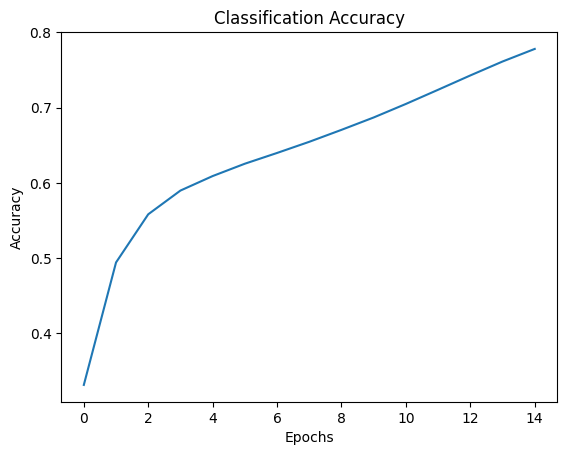

In [77]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()